In [414]:
import numpy as np
from sklearn.decomposition import PCA
import math
import matplotlib.cm as mapcm
import matplotlib.pyplot as maplot
import random

In [415]:
#Enter the gene-expression data file name,the epsilon and the minimum points 
file_name = input("Enter the gene-expression data file name:")
eps = input("Enter the epsilon radius:")
minPts = input("Enter the minimum points:")

Enter the gene-expression data file name:DBSCAN.txt
Enter the epsilon radius:0.25
Enter the minimum points:5


In [416]:
def distance(lst1, lst2):
    '''
    Description: Calculates the euclidean distance between the points.
    '''
    return math.sqrt(np.dot(lst1-lst2, lst1-lst2))

In [417]:
def dbscan(data,eps,minPts):
    
    clusterid = 0
    clustlabels = np.zeros(data.shape[0], dtype=int)
   
    for pt in range(0, data.shape[0]):
        #If the point is not visited,calculate the neighbors of the point
        if clustlabels[pt] == 0: 
        
            neighbors = []
    
            for otherpt in range(0, data.shape[0]):
         # If the distance between the 2 points is less than or equal to epsilon,they can be considered neighbors.
                  if(distance(data[pt],data[otherpt]) <= eps):
                           neighbors.append(otherpt)
            #print(neighbors)    
        #print(neighbors)
        # If the length of the neighbors is greater than the minpoints, a new cluster is created
            if len(neighbors) >= minPts:
                    #ClusterId is assigned to the point
                    clusterid += 1
                    clustlabels[pt] = clusterid 
                    var =0
                    #Expand the cluster by collecting the neighbors of the points within the neighbor collection
                    while var<len(neighbors):
                            point = neighbors[var]

                            if clustlabels[point] == -1:
                            #Previously assigned as noise, but as it neighbors of the point we are assigning it to the cluster.
                                    clustlabels[point] = clusterid 

                            if clustlabels[point] == 0:
                             # If the point has not been processed previously,assign it to a cluster and then collect all the neighbors
                                    clustlabels[point] = clusterid
                                    neighborsIn = []
                                    for otherpointL in range(0, data.shape[0]):
                                        # If the distance between the 2 points is less than or equal to epsilon,they can be considered neighbors.
                                            if(distance(data[point],data[otherpointL]) <= eps):
                                                   neighborsIn.append(otherpointL)
                                    #print("Testing",neighborsIn)                
                                    if len(neighborsIn) >= minPts:
                                             neighbors += neighborsIn
                            var=var+1       
            else:
                # The point is considered a noise
                    clustlabels[pt] = -1 
                    continue
    return  clustlabels  

In [418]:
#Reading the file
if (file_name == "DBSCAN.txt"):
    data=np.genfromtxt(file_name, delimiter=" ")
#Removing the first 2 columns
else:
    data=np.genfromtxt(file_name, delimiter="\t")
#Removing the first 2 columns

dataSelected = data[:,2:]


#clusterList denotes the clusters to which each point belongs to
clusterList = dbscan(dataSelected,float(eps),int(minPts))
print(clusterList)

[1 1 1 ... 4 4 4]


In [419]:
#Fitting the data to PCA
if (file_name == "DBSCAN.txt"):
    new_factors = dataSelected

else:
    pca_set = PCA(n_components=2, svd_solver='full')
    pca_set.fit(dataSelected)
    new_factors = pca_set.transform(dataSelected)

<class 'list'>


Text(0, 0.5, 'Principle Component 2')

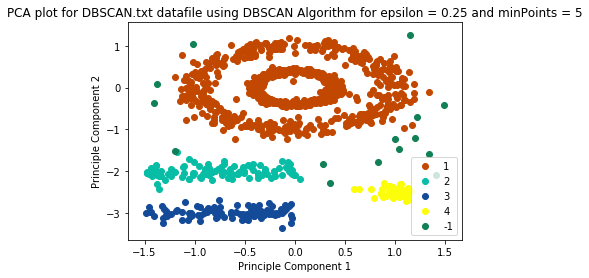

In [420]:
# Generating variable number of colors
unique_classes_list = list(set(clusterList))
#var_col = mapcm.Set1(np.linspace (0,1,len(unique_classes_list)))
var_col  = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(unique_classes_list))]
# var_col = np.asarray(var_col)
print(type(var_col))

#var_col = [maplot.cm.jet(float(i) / max(unique_classes_list)) for i in unique_classes_list]

# Plotting the final dataframe with disease names
plot1 = maplot.figure()
plot11 = plot1.add_subplot(111)

# Taking first and second columns from new_factors()
first_col = new_factors[:,0]
second_col = new_factors[:,1]

# Calculating the coordinates for the plot
for x, y in enumerate(unique_classes_list):
    temp_a = []
    temp_b = []
    
    # Populating temp_a list
    for (m,n) in enumerate(first_col):
        if clusterList[m] == y:
            temp_a.append(n)
            
    # Populating temp_b list
    for (m,n) in enumerate(second_col):
        if clusterList[m] == y:
            temp_b.append(n)
    
    # Converting labels to string
    l = str(int(y))
    
    # Plotting the graph
    plot11.scatter(temp_a,temp_b, c=var_col[x], label=l)
    
#giving the location of the legend as "best"
#This would place the legend at the location in the graph that would overcover minimum data points
plot11.legend(loc='best')

# Giving X axis label
plot11.set_xlabel('Principle Component 1')

plot11.set_title(f"PCA plot for {file_name} datafile using DBSCAN Algorithm for epsilon = {eps} and minPoints = {minPts}")

# Giving Y axis label
plot11.set_ylabel('Principle Component 2')

# Saving the scatter plot as a PDF file
# maplot.savefig(f"PCA plot for {my_file} datafile using HAC Algorithm for {no_of_clusters} clusters")

In [421]:
# jaccard Cofficient and Rand Index

# Taking the ground truth values from data file
ground_truth = data[:, 1]

# Defining empty ground truth and clustering matrix
clustering_matrix = np.zeros((len(dataSelected),len(dataSelected)))
ground_truth_matrix = np.zeros((len(dataSelected),len(dataSelected)))

# Populating the ground truth and clustering matrix
p = 0        
while p <(clustering_matrix.shape[0]):
    clustering_matrix[p][p] = 1
    ground_truth_matrix[p][p] = 1
    q = p+1
    while q < clustering_matrix.shape[1]:
        if clusterList[p] == clusterList[q]:
            clustering_matrix[p][q] = 1
            clustering_matrix[q][p] = 1
        if ground_truth[p] != -1 and ground_truth[q] != -1 and ground_truth[p] == ground_truth[q]:
            ground_truth_matrix[p][q] = 1
            ground_truth_matrix[q][p] = 1
        q += 1
    p += 1
# initializing variables
# f11 = no. of pairs of objects having same class and same clusters
# f00 = no. of pairs of objects having different class and different clusters
# f01 = no. of pairs of objects having different class and same clusters
# f10 = no. of pairs of objects having same class and different clusters
f11=0
f00=0
f10=0
f01=0

# Calculating the values of same_class, same_cluster, different_class, different cluster table(in theory)
for i in range(clustering_matrix.shape[0]):
    for j in range(ground_truth_matrix.shape[1]):
        if (clustering_matrix[i,j] == 1 and ground_truth_matrix[i,j] == 1):
            f11 += 1
        elif (clustering_matrix[i,j] == 0 and ground_truth_matrix[i,j] == 0):
            f00 += 1
        elif (clustering_matrix[i,j] == 1 and ground_truth_matrix[i,j] == 0):
            f10 += 1
        elif (clustering_matrix[i,j] == 0 and ground_truth_matrix[i,j] == 1):
            f01 += 1

# Calculating and printing the Jaccard Cofficient and Rand Index
print(f"The Jaccard Cofficient for DBSCAN Algorithm for  clusters is: {f11/(f11+f10+f01)}")
print(f"The Rand Index for DBSCAN Algorithm for  clusters is: {(f11+f00)/(f11+f10+f01+f00)}")

The Jaccard Cofficient for DBSCAN Algorithm for  clusters is: 0.486756450240998
The Rand Index for DBSCAN Algorithm for  clusters is: 0.7007917355371901
